In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [30]:
rainfall = pd.read_csv('Rainfall.csv')
rainfall

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [31]:
rainfall["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [32]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [33]:
# remove extra spacing for all columns
rainfall.columns = rainfall.columns.str.strip()

In [34]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [35]:
rainfall.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [36]:
rainfall["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [37]:
# handle the missing values
rainfall["winddirection"] = rainfall["winddirection"].fillna(rainfall["winddirection"].mode()[0])
rainfall["windspeed"] = rainfall["windspeed"].fillna(rainfall["windspeed"].median())

In [38]:
print(rainfall.isnull().sum())

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64


In [39]:
rainfall["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [40]:
# converting to 0 and 1 respectively

rainfall["rainfall"] = rainfall["rainfall"].map({"yes":1, "no":0})

In [41]:
rainfall.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


Performing EDA

In [42]:
rainfall.shape

(366, 12)

In [43]:
sns.set(style="whitegrid")

In [44]:
rainfall.describe()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,15.756831,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,8.823592,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,1.000000,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,8.000000,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,16.000000,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,23.000000,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,31.000000,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [45]:
rainfall.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

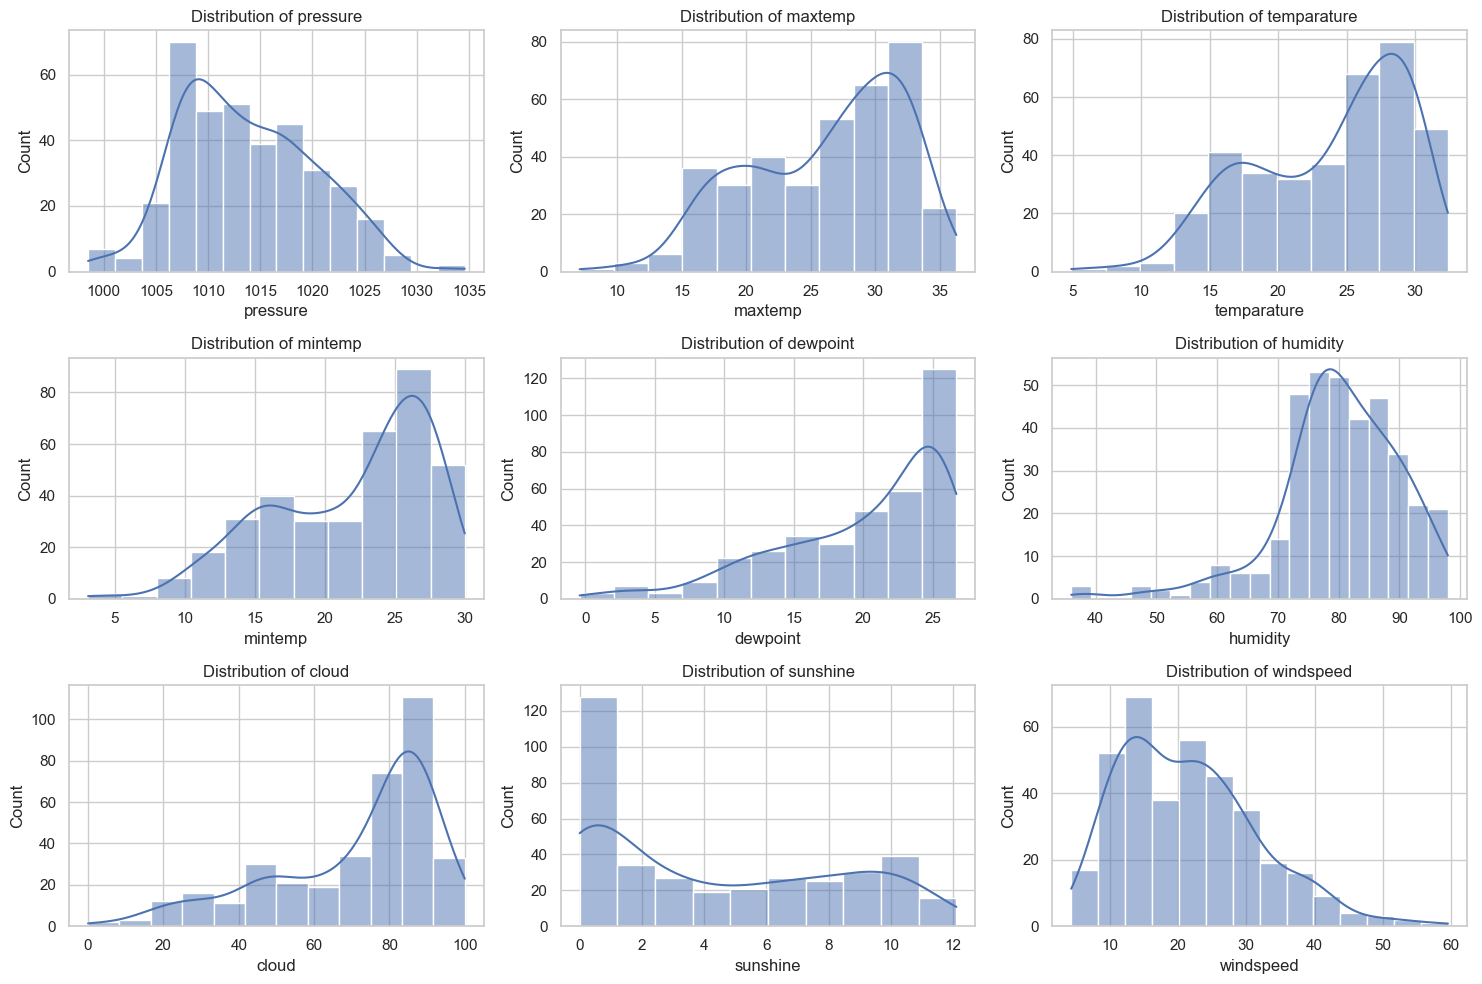

In [46]:
plt.figure(figsize=(15,10))

for i, column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity', 'cloud', 'sunshine','windspeed'], 1):
    plt.subplot(3,3,i)
    sns.histplot(rainfall[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

Data PreProcessing

In [47]:
# drop highly co related columns
# 'maxtemp', 'temparature', 'mintemp', 'dew point' are highly corelated

rainfall = rainfall.drop(columns=['maxtemp', 'temparature', 'mintemp', 'day'])

In [48]:
rainfall.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [49]:
# seperate majority and minority class
df_majority = rainfall[rainfall["rainfall"] == 1]
df_minority = rainfall[rainfall["rainfall"] == 0]

In [50]:
print(df_majority.shape)
print(df_minority.shape)

(249, 8)
(117, 8)


In [51]:
# downsampling the data
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=4)

In [52]:
print(df_majority_downsampled.shape)
print(df_minority.shape)

(117, 8)
(117, 8)


In [53]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled.shape

(234, 8)

In [54]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
50,1023.2,9.6,67,55,1,5.9,20.0,23.9
304,1020.4,21.6,79,66,1,5.3,80.0,40.8
57,1024.7,11.7,79,79,1,5.0,20.0,9.1
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
140,1006.9,24.2,94,88,1,0.1,40.0,22.3


In [55]:
# shuffle the final dataframe
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)

In [56]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1019.6,13.9,90,92,1,0.0,70.0,50.6
1,1013.4,19.5,69,17,0,10.5,70.0,12.4
2,1006.1,24.4,74,27,0,10.8,220.0,8.7
3,1011.5,16.1,90,79,1,1.6,20.0,23.4
4,1021.2,8.4,66,18,0,10.1,20.0,24.4


Splitting the data into training and testing data

In [57]:
X = df_downsampled.drop(columns=["rainfall"])
y = df_downsampled["rainfall"]

In [58]:
print(X)

     pressure  dewpoint  humidity  cloud  sunshine  winddirection  windspeed
0      1019.6      13.9        90     92       0.0           70.0       50.6
1      1013.4      19.5        69     17      10.5           70.0       12.4
2      1006.1      24.4        74     27      10.8          220.0        8.7
3      1011.5      16.1        90     79       1.6           20.0       23.4
4      1021.2       8.4        66     18      10.1           20.0       24.4
..        ...       ...       ...    ...       ...            ...        ...
229    1008.2      25.9        82     85       7.2          220.0       12.8
230    1008.1      24.3        87     84       0.3          220.0       12.0
231    1024.3       6.6        64     88       0.0           20.0       33.5
232    1008.3      24.1        74     29       5.7           10.0        4.4
233    1016.8      22.3        83     81       0.8           80.0       28.9

[234 rows x 7 columns]


In [59]:
print(y)

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    1
Name: rainfall, Length: 234, dtype: int64


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators" : [50, 100, 200],
    "max_features" : ["sqrt", "log2"],
    "max_depth" : [None, 10, 20, 30],
    "min_samples_split" : [2, 5, 10],
    "min_samples_leaf" : [1, 2, 4]
}

In [63]:
# hyperparameter tuning using GRID SEARCH CV
grid_search_rf = GridSearchCV(estimator=model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [65]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameters for Random Forest : ", grid_search_rf.best_estimator_)

best parameters for Random Forest :  RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=42)


Model Evalutaion

In [67]:
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print("Cross Validation Scores : ", cv_scores)
print("Mean Cross Validation Scores : ", np.mean(cv_scores))

Cross Validation Scores :  [0.65789474 0.89473684 0.81081081 0.78378378 0.86486486]
Mean Cross Validation Scores :  0.8024182076813655


In [68]:
y_pred = best_rf_model.predict(X_test)
print("Test Set Accuracy : ", accuracy_score(y_test, y_pred))
print("Test Set Confusion Matrix : \n", confusion_matrix(y_test, y_pred))
print("Classification Report : \n", classification_report(y_test, y_pred))

Test Set Accuracy :  0.723404255319149
Test Set Confusion Matrix : 
 [[14 10]
 [ 3 20]]
Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.67      0.87      0.75        23

    accuracy                           0.72        47
   macro avg       0.75      0.73      0.72        47
weighted avg       0.75      0.72      0.72        47

